# GDP analysis for Indonesia

## Imports 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
os.chdir('..')
from src.regressions import *
from src.helpers import *
from src.statistical_analysis import *
from src.evaluation_metrics import *
from src.feature_engineering import *
os.chdir('notebooks')

## Loading and visualizing the dataset 

Load the dataset in a pandas dataframe.

In [3]:
PATH = os.path.join("..", "data", "Tunisia2.csv")

dataset = pd.read_csv(PATH, index_col=0)

Visualize the dataset.

In [4]:
dataset

,CGPD RELATIVE TO THE UNITED STATES (unit US=100),CONSUMPTION SHARE OF CGPD (unit %),CONSUMPTION SHARE OF RGDPL (unit %),CURRENT SAVINGS (unit %),EXCHANGE RATE (unit US=1),GOVERNMENT SHARE OF CGDP (unit %),GOVERNMENT SHARE OF RGDPL (unit %),INVESTMENT SHARE OF CGDP (unit %),INVESTMENT SHARE OF RGDPL (unit %),OPENNESS IN CONSTANT PRICES (unit %),OPENNESS IN CURRENT PRICES (unit %),POPULATION (unit 000S),PRICE LEVEL OF CONSUMPTION (unit PPP/XRATE),PRICE LEVEL OF GOVERNMENT (unit PPP/XRATE),PRICE LEVEL OF GROSS DOMESTIC PRODUCT (unit US=100),PRICE LEVEL OF INVESTMENT (unit PPP/XRATE),RATIO OF GNP TO GDP (CURRENT PRICES) (unit %),REAL GROSS DOMESTIC PRODUCT PER CAPITA (CURRENT PRICES) (unit $ CURRENT)
YEAR,,,,,,,,,,,,,,,,,,
1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Plot the GDP as a function of year.

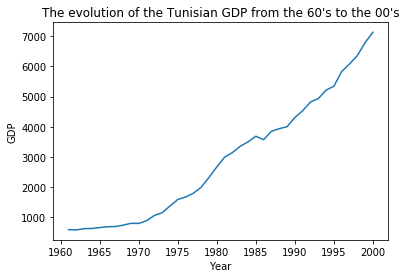

In [5]:
plt.plot(dataset.index, dataset["REAL GROSS DOMESTIC PRODUCT PER CAPITA (CURRENT PRICES) (unit $ CURRENT)"])
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("The evolution of the Tunisian GDP from the 60's to the 00's")
plt.show()

Split the dataset into a matrix `X` for the features and a vector `y` for the labels.

In [6]:
X, y = X_y_from_dataset(dataset)
YEARS = dataset.dropna().index.values
print("We have", X.shape[0], "data points and", X.shape[1], "features")

We have 40 data points and 17 features


In [7]:
YEARS

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000])

Verify whether there are highly correlated features.

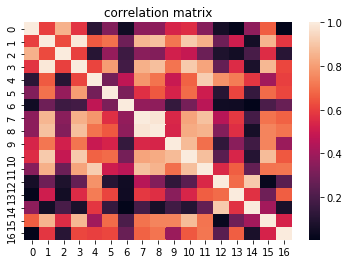

CGPD RELATIVE TO THE UNITED STATES (unit US=100) is highly correlated with:  CONSUMPTION SHARE OF RGDPL (unit %) 

CONSUMPTION SHARE OF CGPD (unit %) is highly correlated with:  CURRENT SAVINGS (unit %), INVESTMENT SHARE OF CGDP (unit %), INVESTMENT SHARE OF RGDPL (unit %), OPENNESS IN CURRENT PRICES (unit %), POPULATION (unit 000S), PRICE LEVEL OF INVESTMENT (unit PPP/XRATE) 

CONSUMPTION SHARE OF RGDPL (unit %) is highly correlated with:  CGPD RELATIVE TO THE UNITED STATES (unit US=100) 

CURRENT SAVINGS (unit %) is highly correlated with:  CONSUMPTION SHARE OF CGPD (unit %), INVESTMENT SHARE OF CGDP (unit %), INVESTMENT SHARE OF RGDPL (unit %), OPENNESS IN CURRENT PRICES (unit %), POPULATION (unit 000S), PRICE LEVEL OF INVESTMENT (unit PPP/XRATE) 

EXCHANGE RATE (unit US=1) is highly correlated with:  POPULATION (unit 000S) 

INVESTMENT SHARE OF CGDP (unit %) is highly correlated with:  CONSUMPTION SHARE OF CGPD (unit %), CURRENT SAVINGS (unit %), INVESTMENT SHARE OF RGDPL (unit %),

In [8]:
correlation_matrix = np.abs(np.corrcoef(X, rowvar=False))

sns.heatmap(correlation_matrix)
plt.title("correlation matrix")
plt.show()

mask = correlation_matrix > 0.8
np.fill_diagonal(mask, False)
for i, m in enumerate(mask): 
    if (sum(m) != 0):
        print(dataset.columns[i], "is highly correlated with: ",
              ", ".join(dataset.columns[np.append(m, False)]), "\n")

Plot the population evolution through time. It's clear they're highly correlated features.

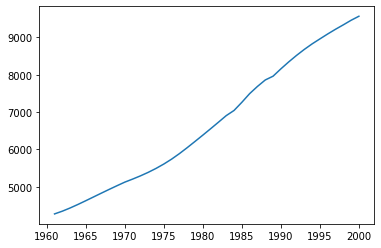

In [9]:
sns.lineplot(data=dataset["POPULATION (unit 000S)"])

In [10]:
print("The condition number is", condition_number(X))

The condition number is 269729.6874301826


In [11]:
VIF_X = VIF(X)
print("The VIF is:", VIF_X, "\n The column with the highest VIF is", dataset.columns[np.argmax(VIF_X)])

The VIF is: [   9.75921311  666.635274    100.95864325  488.92251853  107.70510433
   82.39754367   36.04738449  961.76776745 1014.5560964    18.43461368
   77.89788136  284.00458912  368.45047489   29.68493701  707.38791822
  228.20138854   10.41964665] 
 The column with the highest VIF is INVESTMENT SHARE OF RGDPL (unit %)


The condition number, VIF and correlation matrix all tend to indicate that our data is kind off ill conditionned. We have to perform at least either some model selection, or filter out some predictors.

## The models

Split the data into 80% training and 20% testing sets.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Least Squares

Train with the least squares estimator.

1

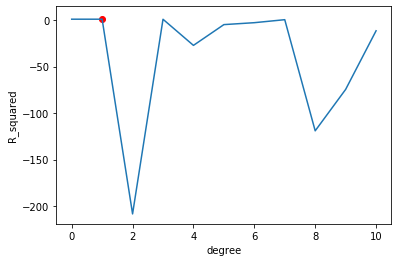

In [13]:
# Degree of zero means we leave the data set the way it is degree of 1 means we simply add a bias degree > 1 
# We compute the polynomial expansion associated with that degree.
d = degree_cross_val(X_train, y_train, 10)
d

Augment the dataset.

In [14]:
# We split the dataset as instructed: the first 80% as train and the next 20% as test.
X_ls = build_poly(X, d)
X_train_ls, X_test_ls, _, _ = train_test_split(X_ls, y)

In [15]:
LS_w = least_squares(X_train_ls, y_train)

LS_prediction_data = predict(X_ls, LS_w)
LS_prediction_test = predict(X_test_ls, LS_w)

In [16]:
print("Testing R^2: ", R_squared(y_test, LS_prediction_test),
      "\nFull data R^2:", R_squared(y, LS_prediction_data))

Testing R^2:  0.30212936918146727 
Full data R^2: 0.9812632558001719


In [17]:
print("Full data adjusted R^2:", adjusted_R_squared(y, LS_prediction_data, X.shape[1]))

Full data adjusted R^2: 0.9667848625548502


Compute the CI for the coefficients.

In [18]:
X_for_var, w_for_var = (X_ls[:, 1:], LS_w[1:]) if d > 0 else (X, LS_w) 
var = variance_least_squares_weights(X_for_var, y, LS_prediction_data)
lower_CI, upper_CI = confidence_interval(X_for_var.shape[0], X_for_var.shape[1], w_for_var, var)

Plot the coefficients with their CI intervals.

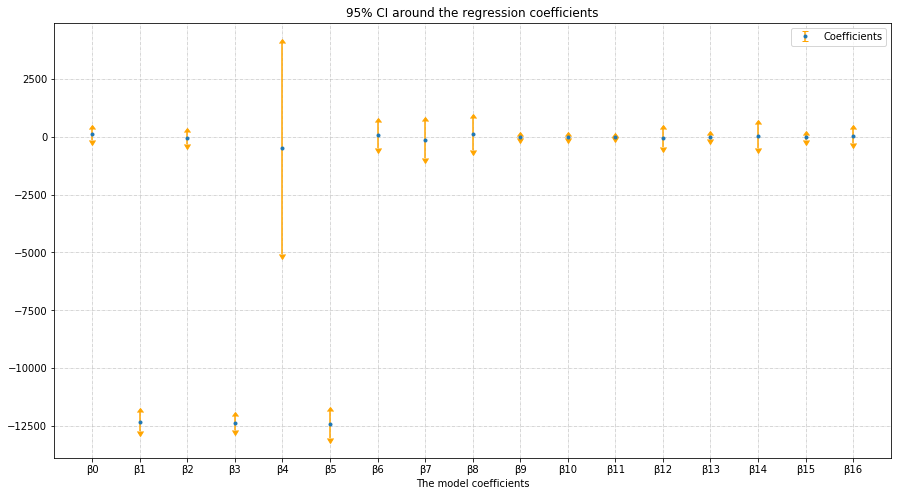

In [19]:
plt.figure(figsize=(15,8))
plt.errorbar(np.arange(X_for_var.shape[1]), w_for_var,
             yerr=np.vstack([np.squeeze(w_for_var-lower_CI), np.squeeze(upper_CI-w_for_var)]),
             fmt=".", ecolor='orange', lolims=True, uplims=True, label="Coefficients")
plt.xticks(np.arange(X.shape[1]), ["β"+str(i) for i in np.arange(X_for_var.shape[1])])
plt.title("95% CI around the regression coefficients")
plt.xlabel("The model coefficients")
plt.legend()
plt.grid(which='both', linestyle='-.', linewidth=0.5)
plt.show()

Compute the CI for the predictions.

In [20]:
var_ = variance_least_squares_line(X_for_var, y, LS_prediction_data)
lower_CI_line, upper_CI_line = confidence_interval(X_for_var.shape[0], X_for_var.shape[1], LS_prediction_data,
                                                   var_)

Plot the CI for the predictions.

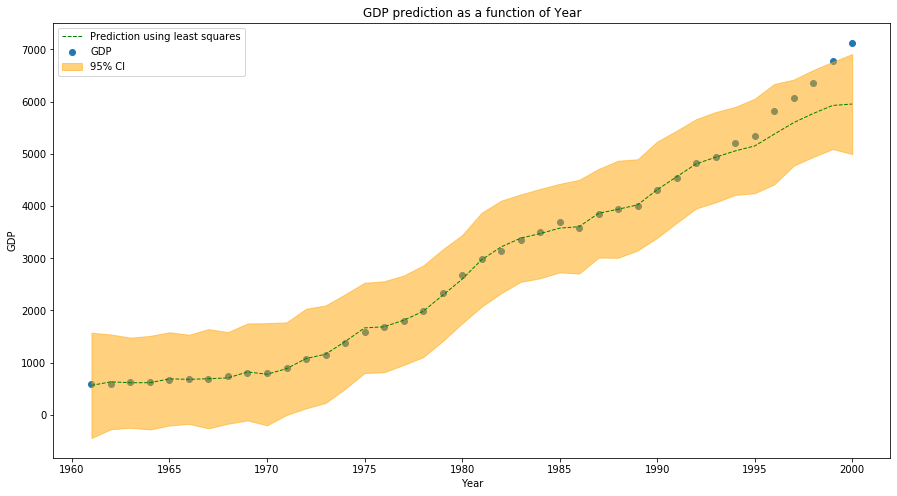

In [21]:
plt.figure(figsize=(15,8))
plt.scatter(YEARS, y, label="GDP")
plt.plot(YEARS, LS_prediction_data, color="g", lw=1, ls='--', label="Prediction using least squares")
plt.gca().fill_between(YEARS, np.squeeze(lower_CI_line), np.squeeze(upper_CI_line),
                       label="95% CI",
                       #color="#b9cfe7",
                       color="orange",
                       alpha=0.5,
                       edgecolor=None)
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("GDP prediction as a function of Year")
plt.legend()
plt.show()

### Ridge Regression

Train the ridge regression model.

In [22]:
lambda_r, d_r = cross_val_ridge(X_train, y_train, plot=False)
X_rr = build_poly(X, d_r)
X_train_rr, X_test_rr, _, _ = train_test_split(X_rr, y)
print("The optimal hyper-parameters for the polynomial expansion and l2 regularization term are respectively:",
      lambda_r, d_r)

The optimal hyper-parameters for the polynomial expansion and l2 regularization term are respectively: 0.21 1


In [23]:
Ridge_w = ridge_regression(X_train_rr, y_train, lambda_r)
Ridge_prediction_data = predict(X_rr, Ridge_w)
Ridge_prediction_test = predict(X_test_rr, Ridge_w)

In [24]:
print("Testing R^2: ", R_squared(y_test, Ridge_prediction_test),
      "\nFull data R^2:", R_squared(y, Ridge_prediction_data))

Testing R^2:  0.3609063356093083 
Full data R^2: 0.9827855714342871


In [25]:
print("Full data adjusted R^2:", adjusted_R_squared(y, Ridge_prediction_data, X_rr.shape[1]))

Full data adjusted R^2: 0.9680303469493904


In [26]:
X_for_var_rr, w_for_var_rr = (X_rr[:, 1:], Ridge_w[1:]) if d_r > 0 else (X, Ridge_w) 
var = variance_least_squares_weights(X_for_var_rr, y, Ridge_prediction_data)
lower_CI_r, upper_CI_r = confidence_interval(X_for_var_rr.shape[0], X_for_var_rr.shape[1], w_for_var_rr, var)

Plot the coefficients with their CI intervals.

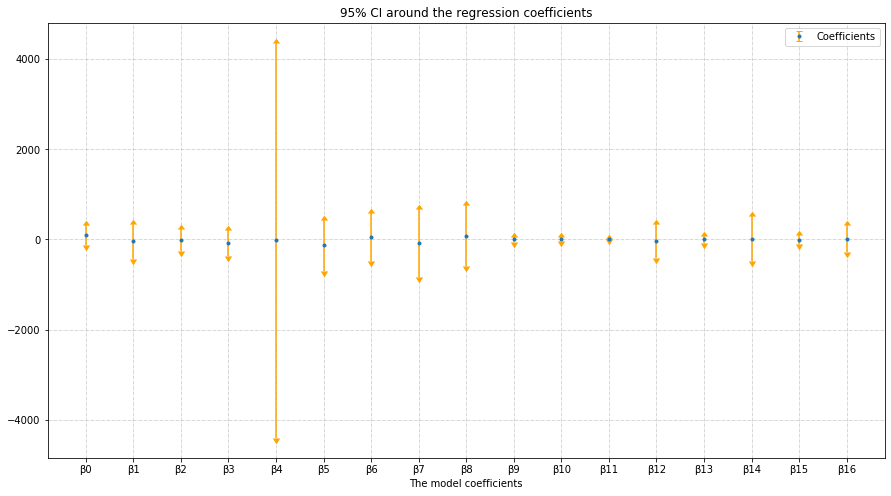

In [27]:
plt.figure(figsize=(15,8))

plt.errorbar(np.arange(X_for_var_rr.shape[1]), w_for_var_rr,
             yerr=np.vstack([np.squeeze(w_for_var_rr-lower_CI_r), np.squeeze(upper_CI_r-w_for_var_rr)]),
             fmt=".", ecolor='orange', lolims=True, uplims=True, label="Coefficients")

plt.xticks(np.arange(X_for_var_rr.shape[1]), ["β"+str(i) for i in np.arange(X_for_var_rr.shape[1])])

plt.title("95% CI around the regression coefficients")
plt.xlabel("The model coefficients")
plt.legend()
plt.grid(which='both', linestyle='-.', linewidth=0.5)
plt.show()

Compute the CI for the predictions.

In [28]:
var_ = variance_least_squares_line(X_for_var_rr, y, Ridge_prediction_data)
lower_CI_line_r, upper_CI_line_r = confidence_interval(X_for_var_rr.shape[0], X_for_var_rr.shape[1], Ridge_prediction_data, var_)

Plot the CI for the predictions.

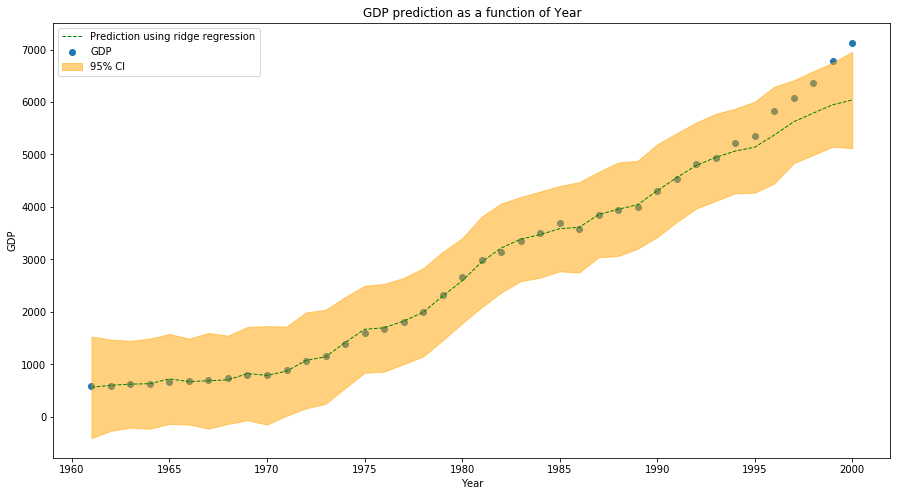

In [29]:
plt.figure(figsize=(15,8))
plt.scatter(YEARS, y, label="GDP")
plt.plot(YEARS, Ridge_prediction_data, color="g", lw=1, ls='--', label="Prediction using ridge regression")
plt.gca().fill_between(YEARS, np.squeeze(lower_CI_line_r), np.squeeze(upper_CI_line_r),
                       label="95% CI",
                       #color="#b9cfe7",
                       color="orange",
                       alpha=0.5,
                       edgecolor=None)
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("GDP prediction as a function of Year")
plt.legend()
plt.show()

### Subset selection

Find the optimal combination of features in terms of $r^2$.

In [30]:
scores, subsets = best_subset_ls(X_train, y_train)

In [31]:
i = np.argmax(scores)
sub = subsets[i]
variables = "\n\t- ".join(dataset.columns[list(sub)])
print("Best performance on the test: ", scores[i], "the subset is: ", sub)
print("This corresponds to the following variables:\n\t- " + variables) 

Best performance on the test:  0.9997542085583582 the subset is:  (2, 4, 5, 11, 12, 13, 14, 15, 16)
This corresponds to the following variables:
	- CONSUMPTION SHARE OF RGDPL (unit %)
	- EXCHANGE RATE (unit US=1)
	- GOVERNMENT SHARE OF CGDP (unit %)
	- POPULATION (unit 000S)
	- PRICE LEVEL OF CONSUMPTION (unit PPP/XRATE)
	- PRICE LEVEL OF GOVERNMENT (unit PPP/XRATE)
	- PRICE LEVEL OF GROSS DOMESTIC PRODUCT (unit US=100)
	- PRICE LEVEL OF INVESTMENT (unit PPP/XRATE)
	- RATIO OF GNP TO GDP (CURRENT PRICES) (unit %)


In [32]:
X_ss = X[:, sub]
X_train_ss, X_test_ss, _, _ = train_test_split(X_ss, y)

Compute lest squares estimator using subset of features.

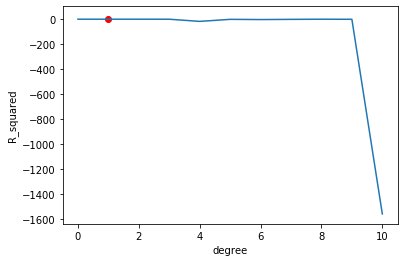

In [33]:
d_ss = degree_cross_val(X_train_ss, y_train, 10)
X_ls_ss = build_poly(X_ss, d_ss)
X_train_ls_ss, X_test_ls_ss, _, _ = train_test_split(X_ls_ss, y)

In [34]:
LS_w_ss = least_squares(X_train_ls_ss, y_train)

LS_ss_prediction_data = predict(X_ls_ss, LS_w_ss)
LS_ss_prediction_test = predict(X_test_ls_ss, LS_w_ss)

In [35]:
print("Testing R^2:  ", R_squared(y_test, LS_ss_prediction_test),
      "\nFull data R^2:", R_squared(y, LS_ss_prediction_data))

Testing R^2:   0.13905252989392514 
Full data R^2: 0.9761324267837447


In [36]:
print("Full data adjusted R^2:", adjusted_R_squared(y, LS_ss_prediction_data, X.shape[1]))

Full data adjusted R^2: 0.9576893020257292


In [37]:
lambda_r_ss, d_r_ss = cross_val_ridge(X_train_ss, y_train, plot=False)
print("The optimal hyper-parameters for the polynomial expansion and l2 regularization term are respectively:",
      lambda_r_ss, d_r_ss)

The optimal hyper-parameters for the polynomial expansion and l2 regularization term are respectively: 0.66 2


In [38]:
X_r_ss = build_poly(X_ss, d_ss)
X_train_r_ss, X_test_r_ss, _, _ = train_test_split(X_r_ss, y)

In [39]:
Ridge_w_lambda_ss = ridge_regression(X_train_r_ss, y_train, lambda_r_ss)

Ridge_prediction_lambda_ss_data = predict(X_r_ss, Ridge_w_lambda_ss)
Ridge_prediction_lambda_ss_test = predict(X_test_r_ss, Ridge_w_lambda_ss)

In [40]:
print("Testing R^2: ", R_squared(y_test, Ridge_prediction_lambda_ss_test),
      "\nFull data R^2:", R_squared(y, Ridge_prediction_lambda_ss_data))

Testing R^2:  0.5799469243743859 
Full data R^2: 0.987023207356908


In [41]:
print("Full data adjusted R^2:", adjusted_R_squared(y, Ridge_prediction_lambda_ss_data, X.shape[1]))

Full data adjusted R^2: 0.9769956857690641


Testing R^2:   0.3667706805104518 
Full data R^2: 0.9828520872634281
Full data adjusted R^2: 0.9696014274215317


NameError: name 'lambda_r_g2s' is not defined

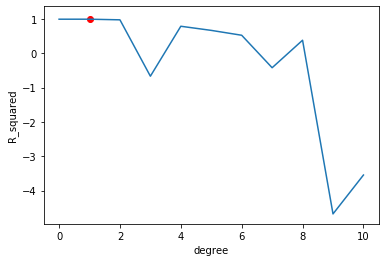

In [42]:
idx = general_to_simple(X_train, y_train)
X_g2s = X[:, idx]
X_train_g2s, X_test_g2s, _, _ = train_test_split(X_ss, y)
d_g2s = degree_cross_val(X_train_g2s, y_train, 10)
X_ls_g2s = build_poly(X_g2s, d_g2s)
X_train_ls_g2s, X_test_ls_g2s, _, _ = train_test_split(X_ls_g2s, y)
LS_w_g2s = least_squares(X_train_ls_g2s, y_train)

LS_g2s_prediction_data = predict(X_ls_g2s, LS_w_g2s)
LS_g2s_prediction_test = predict(X_test_ls_g2s, LS_w_g2s)
print("Testing R^2:  ", R_squared(y_test, LS_g2s_prediction_test),
      "\nFull data R^2:", R_squared(y, LS_g2s_prediction_data))

print("Full data adjusted R^2:", adjusted_R_squared(y, LS_g2s_prediction_data, X.shape[1]))
X_r_g2s = build_poly(X_g2s, d_g2s)
X_train_r_g2s, X_test_r_g2s, _, _ = train_test_split(X_r_g2s, y)
Ridge_w_lambda_g2s = ridge_regression(X_train_r_g2s, y_train, lambda_r_g2s)

Ridge_prediction_lambda_g2s_data = predict(X_r_g2s, Ridge_w_lambda_g2s)
Ridge_prediction_lambda_g2s_test = predict(X_test_r_g2s, Ridge_w_lambda_g2s)
print("Testing R^2: ", R_squared(y_test, Ridge_prediction_lambda_g2s_test),
      "\nFull data R^2:", R_squared(y, Ridge_prediction_lambda_g2s_data))

print("Full data adjusted R^2:", adjusted_R_squared(y, Ridge_prediction_lambda_g2s_data, X.shape[1]))